In [1]:
import matplotlib.pyplot as plt
from glob import glob
import json
import numpy as np

In [9]:
root_path = "benchmark_results_128/*.json"

model_name2data = {}
for path in list(glob(root_path)):
    file_name = path.split("/")[-1].replace(".json", "")
    team_name, model_name, _, _ = file_name.split("_")
    print(team_name, model_name)
    with open(path, "r") as f:
        data = json.load(f)
    model_name2data[model_name] = data

VRLLab TurkishBERTweet
google-bert bert-base-multilingual-cased
boun-tabi-LMG TURNA
dbmdz bert-base-turkish-128k-uncased
meta-llama Meta-Llama-3-8B-Instruct
loodos albert-base-turkish-uncased
google mt5-large
dbmdz convbert-base-turkish-cased


In [3]:
list(model_name2data.keys())

['TurkishBERTweet',
 'bert-base-multilingual-cased',
 'TURNA',
 'bert-base-turkish-128k-uncased',
 'Meta-Llama-3-8B-Instruct',
 'albert-base-turkish-uncased',
 'mt5-large',
 'convbert-base-turkish-cased']

/tmp/ipykernel_2431360/3563892035.py:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([r"$2^{" + str(i) + r"}$" for i in range(0,13)], fontsize=12)
/tmp/ipykernel_2431360/3563892035.py:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{i:.2f}" for i in yticks], fontsize=12)
/tmp/ipykernel_2431360/3563892035.py:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  axin1.set_yticklabels(yax1_ticks, fontsize=10)


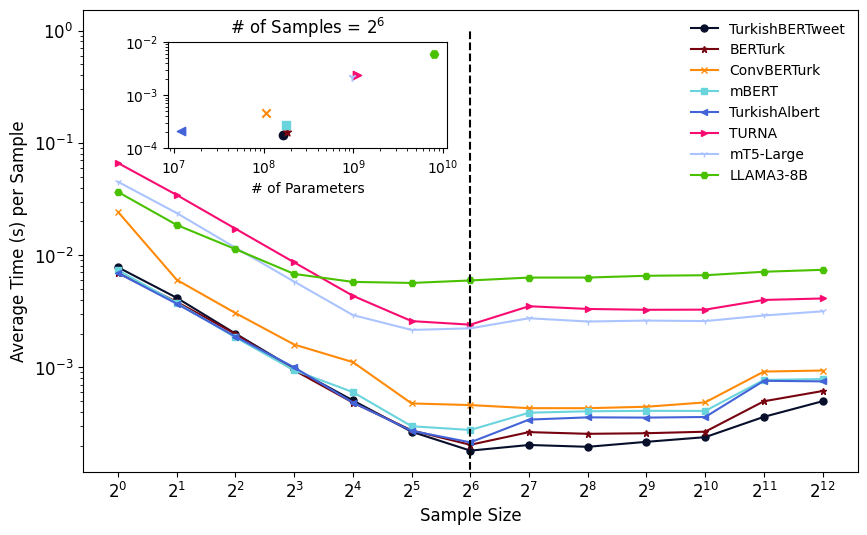

In [5]:
model_name2average = {}
model_name2_std = {}
for model_name, data in model_name2data.items():
    model_name2average[model_name] = (np.array(data["64"])/ 64).mean() 
    model_name2_std[model_name] = (np.array(data["64"])/ 64).std()


fig, ax = plt.subplots(1,1, figsize=(10, 6))
x = sorted([int(i) for i in model_name2data["TURNA"].keys()])
x = [str(i) for i in x]
 # BERT-BASED 11
# google/mt5-large => 7
# TURNA => 6


model2BS = {
    'TurkishBERTweet': 11,
    'bert-base-turkish-128k-uncased': 11,
    'convbert-base-turkish-cased': 11,
    'albert-base-turkish-uncased': 11,
    'TURNA': 6,
    'bert-base-multilingual-cased': 11,
    'mt5-large':7, 
    "Meta-Llama-3-8B-Instruct":3

}

model2size = {
 'TurkishBERTweet': 162842112,
 'bert-base-turkish-128k-uncased': 184345344,
 'convbert-base-turkish-cased': 106815624,
 'bert-base-multilingual-cased': 177853440,
 'albert-base-turkish-uncased': 11939584,
 'TURNA': 1108925440,
 'mt5-large':973466624, 
"Meta-Llama-3-8B-Instruct": 8_000_000_000,
}

model_id2model_name = {
    'TurkishBERTweet': "TurkishBERTweet",
    'bert-base-turkish-128k-uncased': "BERTurk",
    'convbert-base-turkish-cased': "ConvBERTurk",
    'bert-base-multilingual-cased': "mBERT",
    'albert-base-turkish-uncased': "TurkishAlbert",
    'TURNA': "TURNA",
    'mt5-large':"mT5-Large", 
    "Meta-Llama-3-8B-Instruct": "LLAMA3-8B",
}

COLORS = [
    "#070F2B",
    "#76030f",
    "#FF8A08",
    "#6AD4DD",
    "#4363d8",
    "#f90c71",
    "#abc4ff",
    "#4AC100",  

]
counter = 0
markers = ['o','*','x','s','<','>','1','H','3','4','8','s','p','P','h','H','+','x','X','D','d','|','_']

for model_name in model2size:
    data = model_name2data[model_name]
    all_data = []
    for sample_size in x:
        all_data.append(np.array(data[sample_size]).mean()/int(sample_size))
    
    # label = r"BatchSize: $2^{" + str(model2BS[model_name]).zfill(2) + r"}$ " + model_name
    ax.plot(x, all_data, label=model_id2model_name[model_name], color=COLORS[counter], marker=markers[counter], markersize=5)
    ax.set_xticklabels([r"$2^{" + str(i) + r"}$" for i in range(0,13)], fontsize=12)
    
    # get y ticks
    yticks = ax.get_yticks()
    ax.set_yticklabels([f"{i:.2f}" for i in yticks], fontsize=12)

    counter += 1

ax.vlines("64", 0, 1, linestyles='dashed', color="black")   
ax.set_xlabel("Sample Size", fontsize=12)
ax.set_yscale("log")
ax.set_ylabel("Average Time (s) per Sample", fontsize=12)
plt.legend(frameon=False)

axin1 = ax.inset_axes([0.11, 0.70, 0.36, 0.23])

ordered_average = []
ordered_std = []
ordered_sizes = []
ordered_model_names = []
for model_name in model2size:
    ordered_sizes.append(model2size[model_name])
    ordered_average.append(model_name2average[model_name])
    ordered_std.append(model_name2_std[model_name])
    ordered_model_names.append(model_id2model_name[model_name])

for i, (xi, yi) in enumerate(zip(ordered_sizes, ordered_average)):
    # axin1.vlines(ordered_sizes[i], ordered_average[i]-ordered_std[i], ordered_average[i]+ordered_std[i], linestyles='-', color=COLORS[i])
    axin1.scatter(x=[ordered_sizes[i]],y=[ordered_average[i]], c=[COLORS[i]], marker=markers[i],)

yax1_ticks = axin1.get_yticks()
axin1.set_yticklabels(yax1_ticks, fontsize=10)


axin1.set_title("# of Samples = $2^6$")
axin1.set_ylim(1e-4, 1e-2)
axin1.set_xscale("log")
axin1.set_yscale("log")
axin1.set_xlabel("# of Parameters")

plt.savefig("benchmark_results_128/benchmark_results.pdf", bbox_inches="tight", dpi=300)
plt.show()

In [8]:
for i, (xi, yi) in enumerate(zip(ordered_sizes, ordered_average)):
    print( ordered_model_names[i], "MODEL SIZE:", ordered_sizes[i], "TIME:", ordered_average[i])

TurkishBERTweet MODEL SIZE: 162842112 TIME: 0.0001809876412153244
BERTurk MODEL SIZE: 184345344 TIME: 0.00020403150469064713
ConvBERTurk MODEL SIZE: 106815624 TIME: 0.0004607611894607544
mBERT MODEL SIZE: 177853440 TIME: 0.0002764164283871651
TurkishAlbert MODEL SIZE: 11939584 TIME: 0.00021447472274303437
TURNA MODEL SIZE: 1108925440 TIME: 0.0023983649536967275
mT5-Large MODEL SIZE: 973466624 TIME: 0.002224358394742012
LLAMA3-8B MODEL SIZE: 8000000000 TIME: 0.005940064378082752
